In [39]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [40]:
T = 100.
dt = 0.01
N = int(T/dt) + 1
t = numpy.linspace(0., T, N)

In [41]:
z0 = 100.
b0 = 10.
zt = 100.
g = 9.81

u = numpy.array([z0, b0])

In [42]:
z = numpy.zeros(N)
z[0] = z0

In [43]:
for n in range(1, N):
    u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
    z[n] = u[0]

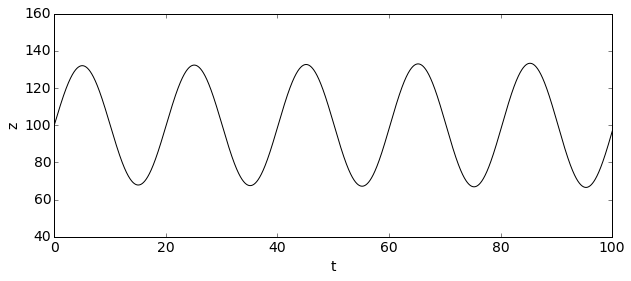

In [44]:
pyplot.figure(figsize=(10, 4))
pyplot.ylim(40, 160)
pyplot.tick_params(axis='both', labelsize =14)
pyplot.xlabel('t', fontsize = 14)
pyplot.ylabel('z', fontsize = 14)
pyplot.plot(t, z, 'k')

In [45]:
z_exact = b0*(zt/g)**0.5*numpy.sin((g/zt)**0.5*t) + (z0-zt)*numpy.cos((g/zt)**0.5*t) + zt

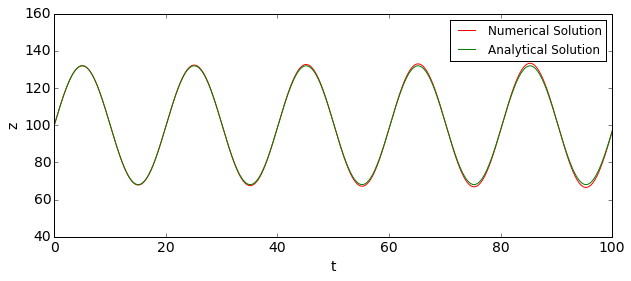

In [46]:
pyplot.figure(figsize=(10,4))
pyplot.ylim(40,160)
pyplot.tick_params(axis='both', labelsize=14)
pyplot.xlabel('t', fontsize=14)
pyplot.ylabel('z', fontsize=14)
pyplot.plot(t,z, 'r')
pyplot.plot(t,z_exact, 'g')
pyplot.legend(['Numerical Solution', 'Analytical Solution'])

In [47]:
?enumerate

In [51]:
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001])
z_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    N = int(T/dt)+1
    t = numpy.linspace(0., T, N)
    u = numpy.array([z0, b0])
    z = numpy.empty_like(t)
    z[0] = z0
    
    for n in range(1,N):
        u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
        z[n] = u[0]
        
    z_values[i] = z.copy()

In [52]:
def get_error(z, dt):
    N = len(z)
    t = numpy.linspace(0., T, N)
    
    z_exact = b0*(zt/g)**0.5*numpy.sin((g/zt)**0.5*t) + (z0-zt)*numpy.cos((g/zt)**0.5*t) + zt
    return dt*numpy.sum(numpy.abs(z-z_exact))

In [53]:
error_values = numpy.empty_like(dt_values)
for i, dt in enumerate(dt_values):
    error_values[i] = get_error(z_values[i], dt)

[ 0.1    0.05   0.01   0.005  0.001]


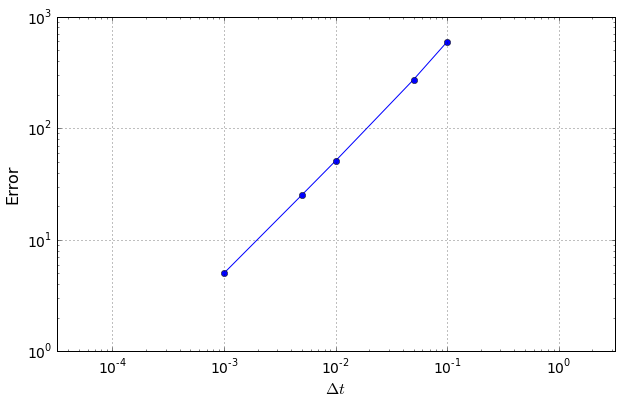

In [67]:
pyplot.figure(figsize=(10,6))
pyplot.tick_params(axis='both', labelsize=14)
pyplot.grid(True)
pyplot.xlabel('$\Delta t$', fontsize=16)
pyplot.ylabel('Error', fontsize=16)
#pyplot.xlim(0.1, 0)
pyplot.loglog(dt_values, error_values, 'bo-')
pyplot.axis('equal')
print dt_values

In [69]:
def euler_func(dt):
    T = 100.
    N = int(T/dt)+1
    t = numpy.linspace(0., T, N)
    z0 = 100.
    b0 = 10.
    zt = 100.
    g = 9.81
    u = numpy.array([z0, b0])
    z = numpy.empty_like(t)
    z[0] = z0
    for n in range(1,N):
        u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
        z[n] = u[0]
    return z

In [70]:
z_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)
error_values = numpy.empty_like(dt_values)
for i, dt in enumerate(dt_values):
    z_values[i] = euler_func(dt)
    error_values[i] = get_error(z_values[i], dt)

[ 0.1    0.05   0.01   0.005  0.001]
[ 595.36733833  272.67739754   50.96686962   25.2726943     5.02119422]


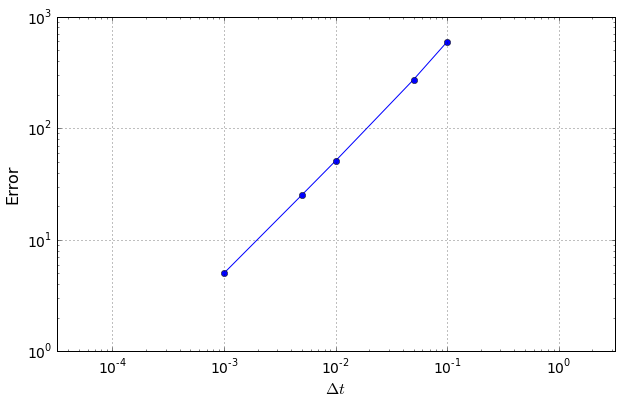

In [72]:
pyplot.figure(figsize=(10,6))
pyplot.tick_params(axis='both', labelsize=14)
pyplot.grid(True)
pyplot.xlabel('$\Delta t$', fontsize=16)
pyplot.ylabel('Error', fontsize=16)
pyplot.loglog(dt_values, error_values, 'bo-')
pyplot.axis('equal')
print dt_values
print error_values